Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте
```python
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("../../../Datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop(["target"], axis=1)
y = heart_disease.target

In [4]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [5]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [6]:
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({
    "Feature": list(X),
    "Feature importances": feature_importances
})

feature_importances_df = feature_importances_df.sort_values("Feature importances", ascending=False)

<Axes: xlabel='Feature importances', ylabel='Feature'>

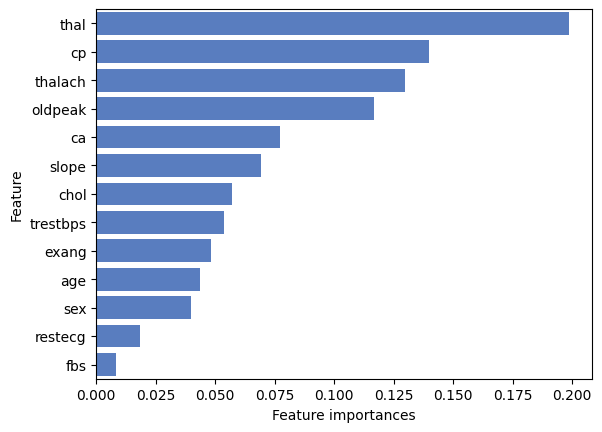

In [7]:
sns.set_color_codes("muted")
sns.barplot(
    x="Feature importances", 
    y="Feature", 
    data=feature_importances_df,
    label="importance", 
    color="b"
)